<a href="https://colab.research.google.com/github/airborne3586/Data_Analysis_EX_PORT/blob/main/HR_2%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%ED%87%B4%EC%A7%81_%EC%B4%89%EB%B0%9C_%EC%9A%94%EC%9D%B8_%EB%B0%9C%EA%B5%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
#utiliser GPU
import torch
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'Tesla T4'

In [3]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns


plt.rc('font', family='NanumBarunGothic')

# 퇴직을 촉발하는 주요 요인 발굴

In [5]:
# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/EX_port/hr_data.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

## 기본적인 특성 확인

In [6]:
#  값별 count 계산
count_by_rating = df.groupby('Attrition').size()

print(count_by_rating)


Attrition
No     1233
Yes     237
dtype: int64


퇴직자는 237명이고 재직자는 1233명임을 확인

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 나이 분포


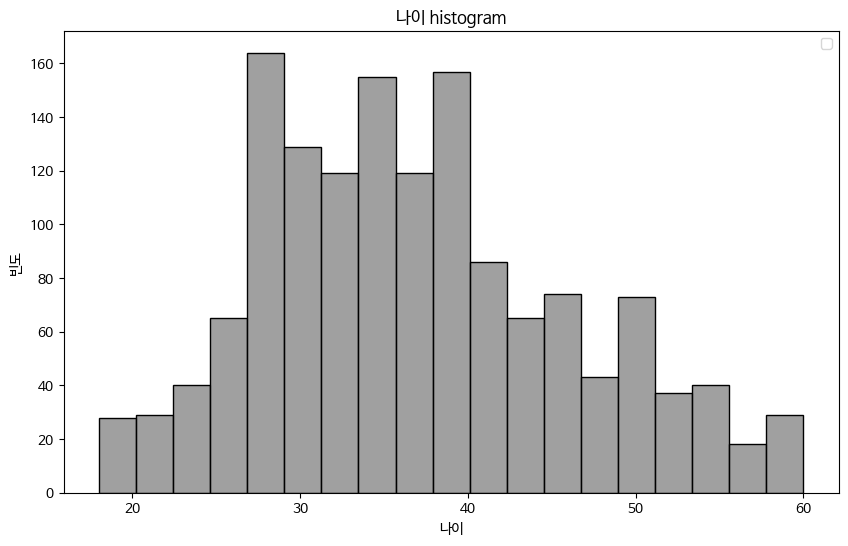

In [8]:
# 나이 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')

sns.histplot(data=df, x='Age', color='grey')


plt.xlabel('나이')
plt.ylabel('빈도')
plt.title('나이 histogram')
plt.legend()
plt.show()

#### 퇴직자들의 나이 분포

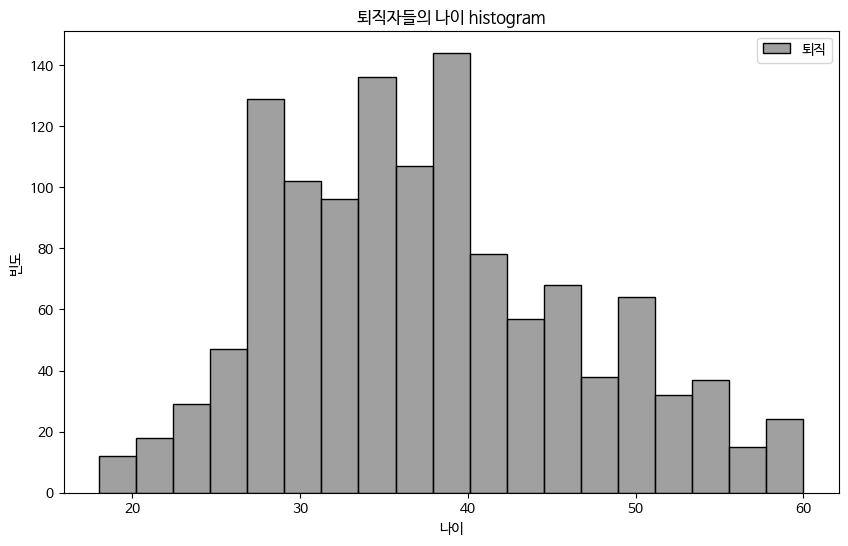

In [9]:

# 퇴직 여부에 따라 데이터 분류
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

# 퇴직 여부에 따른 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')

sns.histplot(data=attrition_no, x='Age', color='grey', label='퇴직')


plt.xlabel('나이')
plt.ylabel('빈도')
plt.title('퇴직자들의 나이 histogram')
plt.legend()
plt.show()

### 1) 집과의 거리(DistanceFromHome)

#### 집과의 거리가 멀 수록 퇴사자가 많을 것이다?

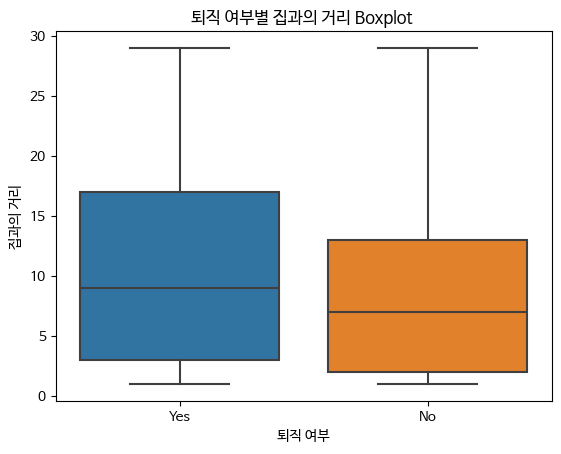

In [10]:
import seaborn as sns

#박스플롯
plt.rc('font', family='NanumBarunGothic')
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.xlabel('퇴직 여부')
plt.ylabel('집과의 거리')
plt.title('퇴직 여부별 집과의 거리 Boxplot ')
plt.show()


상자그림을 보면 퇴사 집단의 평균을 볼때 퇴사집단의 집과의 거리 평균이 약간 더 멀다는 것을 볼 수 있다.또한 집과의 거리가 먼 쪽으로 분포되어 있다. 따라서 집과의 거리가 퇴직 여부에 어느정도 영향을 줄 가능성이 있다고 판단할 수 있다.

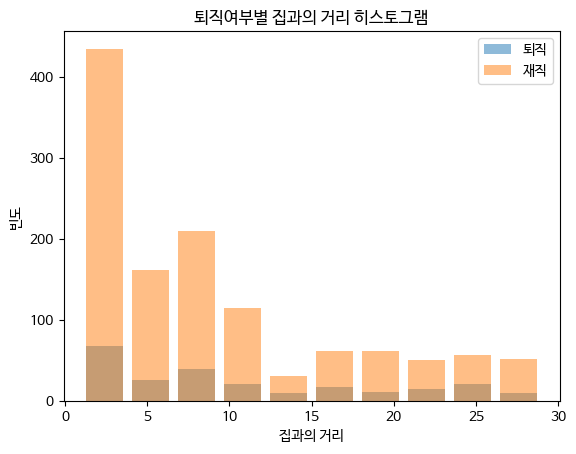

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 데이터의 최소값과 최대값
min_value = df['DistanceFromHome'].min()
max_value = df['DistanceFromHome'].max()

# 구간의 수 계산
num_bins = 10

# 히스토그램 그리기
plt.rc('font', family='NanumBarunGothic')
plt.hist(df[df['Attrition'] == 'Yes']['DistanceFromHome'], bins=num_bins, alpha=0.5, label='퇴직', rwidth=0.8)  # 막대 폭 설정
plt.hist(df[df['Attrition'] == 'No']['DistanceFromHome'], bins=num_bins, alpha=0.5, label='재직', rwidth=0.8)  # 막대 폭 설정
plt.xlabel('집과의 거리')
plt.ylabel('빈도')
plt.title('퇴직여부별 집과의 거리 히스토그램')
plt.legend()
plt.show()


In [12]:

# 각 집단의 IQR 값 계산
yes_distance = df[df['Attrition'] == 'Yes']['DistanceFromHome']
no_distance = df[df['Attrition'] == 'No']['DistanceFromHome']
yes_iqr = np.percentile(yes_distance, 75) - np.percentile(yes_distance, 25)
no_iqr = np.percentile(no_distance, 75) - np.percentile(no_distance, 25)


yes_q1 = np.percentile(yes_distance, 25)
yes_q3 = np.percentile(yes_distance, 75)
no_q1 = np.percentile(no_distance, 25)
no_q3 = np.percentile(no_distance, 75)

# 결과 출력
print("퇴직한 직원의 집과의 거리 Q1 값:", yes_q1)
print("퇴직한 직원의 집과의 거리 Q3 값:", yes_q3)
print("퇴직하지 않은 직원의 집과의 거리 Q1 값:", no_q1)
print("퇴직하지 않은 직원의 집과의 거리 Q3 값:", no_q3)
print('*'*100)

yes_in_iqr = yes_distance[(yes_distance >= yes_q1) & (yes_distance <= yes_q3)]
no_in_iqr = no_distance[(no_distance >= no_q1) & (no_distance <= no_q3)]

yes_in_iqr_percentage = len(yes_in_iqr) / len(yes_distance) * 100
no_in_iqr_percentage = len(no_in_iqr) / len(no_distance) * 100

print("퇴직한 직원 중 IQR 범위 내에 있는 직원의 비율: {:.2f}%".format(yes_in_iqr_percentage))
print("퇴직하지 않은 직원 중 IQR 범위 내에 있는 직원의 비율: {:.2f}%".format(no_in_iqr_percentage))



퇴직한 직원의 집과의 거리 Q1 값: 3.0
퇴직한 직원의 집과의 거리 Q3 값: 17.0
퇴직하지 않은 직원의 집과의 거리 Q1 값: 2.0
퇴직하지 않은 직원의 집과의 거리 Q3 값: 13.0
****************************************************************************************************
퇴직한 직원 중 IQR 범위 내에 있는 직원의 비율: 53.59%
퇴직하지 않은 직원 중 IQR 범위 내에 있는 직원의 비율: 60.99%


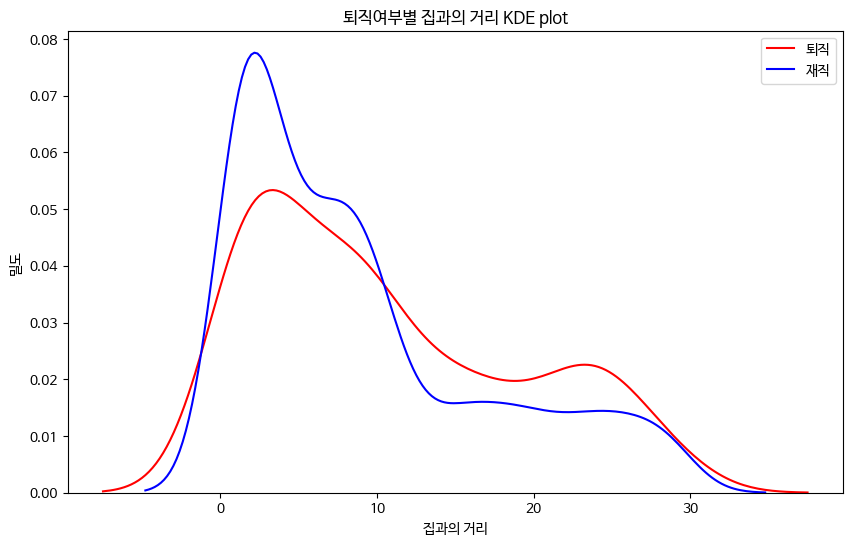

In [13]:

# 데이터의 최소값과 최대값
min_value = df['DistanceFromHome'].min()
max_value = df['DistanceFromHome'].max()

# 퇴직 여부에 따른 KDE plot 그리기
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')

sns.kdeplot(df[df['Attrition'] == 'Yes']['DistanceFromHome'], label='퇴직', color='red')
sns.kdeplot(df[df['Attrition'] == 'No']['DistanceFromHome'], label='재직', color='blue')

plt.xlabel('집과의 거리')
plt.ylabel('밀도')
plt.title('퇴직여부별 집과의 거리 KDE plot')
plt.legend()
plt.show()


### 2) 월소득(MonthlyIncome)

#### 월소득이 낮을 수록 퇴사자가 많을 것이다?



월소득이 높은 사람들은 퇴직하지 않을 가능성이 높다.
월소득이 높을수록 경제적인 안정성이 높아져 퇴직하지 않는 경향이 있다는 가정.


월소득이 낮은 사람들은 퇴직할 가능성이 높다.
이 가설은 월소득이 낮을수록 경제적인 어려움이 있어 퇴직할 가능성이 높다는 가정입니다.




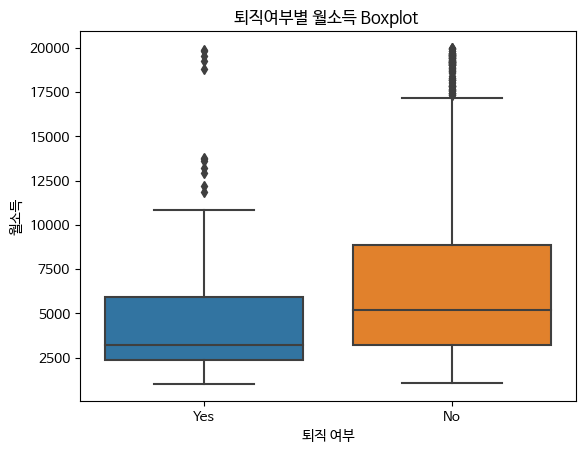

In [14]:
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

#박스플롯
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.xlabel('퇴직 여부')
plt.ylabel('월소득')
plt.title('퇴직여부별 월소득 Boxplot ')
plt.show()


In [15]:
# 퇴직 여부에 따른 월소득 평균 계산
mean_income = df.groupby('Attrition')['MonthlyIncome'].mean()

print(mean_income)

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


Boxplot을 그려보았으나 이상치가 많아 이상치도 따로 확인해봐야 할 것 같다. 우선 Boxplot만 볼때 두 집단의 평균의 차이에 따라 월소득이 퇴직 여부에 충분한 영향을 줄 가능성이 있을 것으로 보인다. 또한 재직 집단의 월 소득 분포가 넓게 펼쳐져 있는 점을 보았을때 잠재적 퇴직자가도 있지 않을 까 하는 궁금증이 든다.

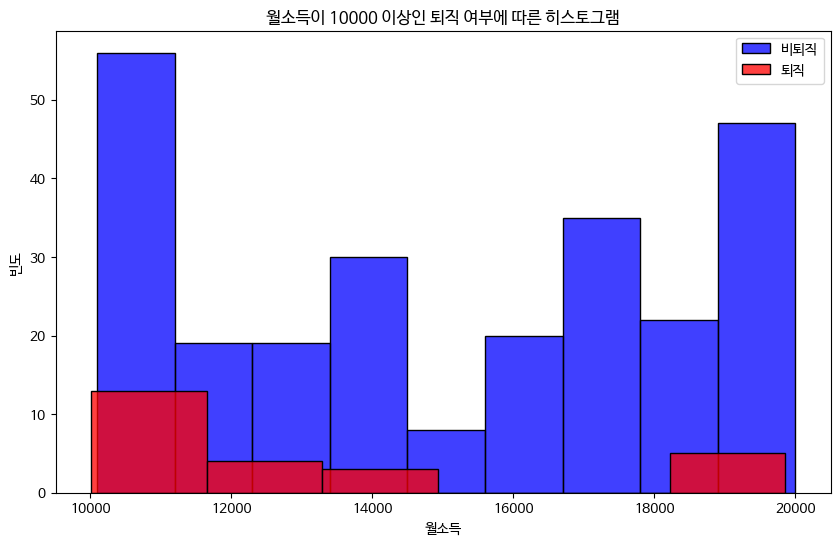

In [16]:
# 월소득이 10000 이상인 데이터 추출
income_above_10000 = df[df['MonthlyIncome'] >= 10000]

# 퇴직 여부에 따라 데이터 분류
attrition_yes = income_above_10000[income_above_10000['Attrition'] == 'Yes']
attrition_no = income_above_10000[income_above_10000['Attrition'] == 'No']

# 퇴직 여부에 따른 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')

sns.histplot(data=attrition_no, x='MonthlyIncome', color='blue', label='비퇴직')
sns.histplot(data=attrition_yes, x='MonthlyIncome', color='red', label='퇴직')

plt.xlabel('월소득')
plt.ylabel('빈도')
plt.title('월소득이 10000 이상인 퇴직 여부에 따른 히스토그램')
plt.legend()
plt.show()

월소득이  약 15000에서 18000의 구간에서 퇴직자가 없다. 왜 그럴까?

kde plot을 통한 분포 확인

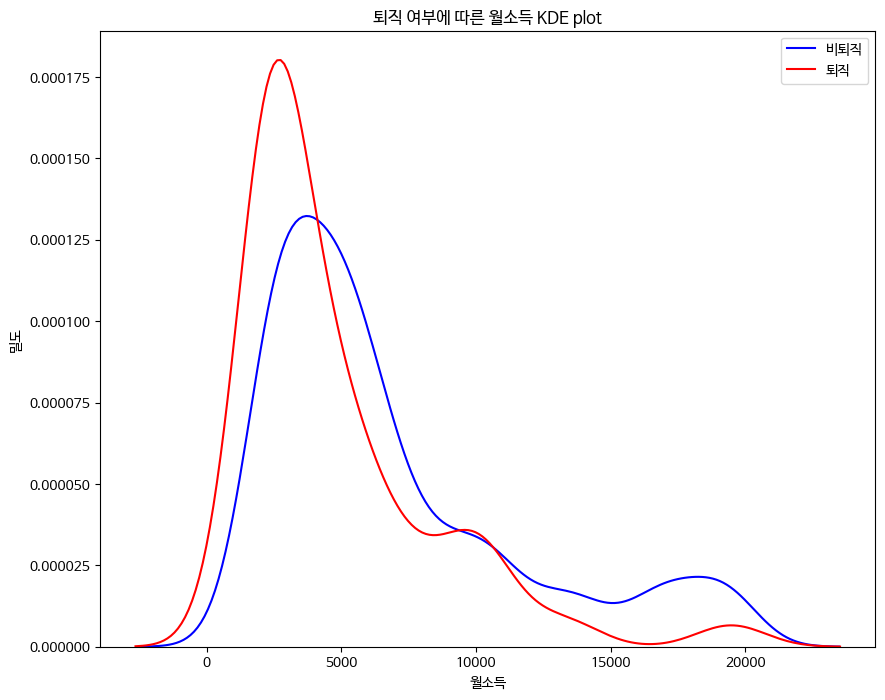

In [17]:
# 월소득이 10000 이상인 데이터 추출
income_above_10000 = df[df['MonthlyIncome'] >= 10000]

# 퇴직 여부에 따라 데이터 분류
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

# 퇴직 여부에 따른 KDE plot 그리기
plt.figure(figsize=(10, 8))
plt.rc('font', family='NanumBarunGothic')

sns.kdeplot(data=attrition_no, x='MonthlyIncome', color='blue', label='비퇴직')
sns.kdeplot(data=attrition_yes, x='MonthlyIncome', color='red', label='퇴직')

plt.xlabel('월소득')
plt.ylabel('밀도')
plt.title('퇴직 여부에 따른 월소득 KDE plot')
plt.legend()
plt.show()


#### 3) 업무환경에 대한 만족도(EnvironmentSatisfaction)

#### 업무환경에 대한 만족도가 낮을 수록 퇴사자가 많을 것이다?

In [18]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

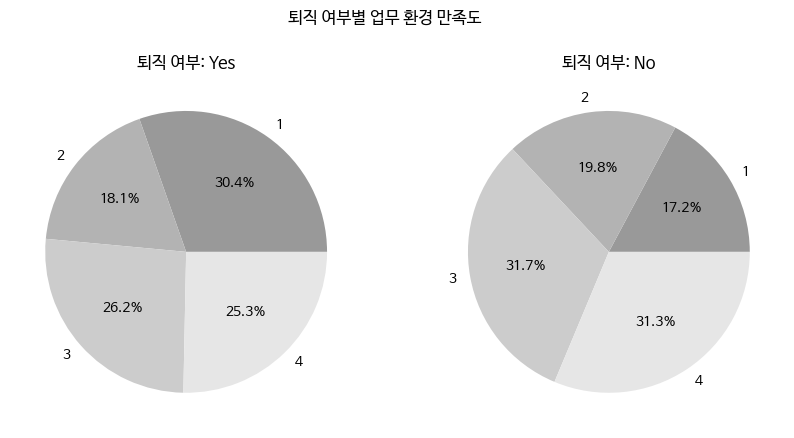

In [19]:
import matplotlib.pyplot as plt

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
satisfaction_counts = df.groupby(['Attrition', 'EnvironmentSatisfaction']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_satisfaction = satisfaction_counts['Yes']
no_satisfaction = satisfaction_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))
plt.rc('font', family='NanumBarunGothic')

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('퇴직 여부별 업무 환경 만족도')
plt.show()


업무 만족도가 1일 경우 퇴직 여부에 있어 약 13%p나 차이가 난다. 업무환경의 만족도가 유의미하게 영향을 줄 가능성이 있을 것이라고 판단할 수 있다.

### 4) 업무성과(PerformanceRating)

업무성과가 낮을 수록 퇴사자가 많을 것이다?

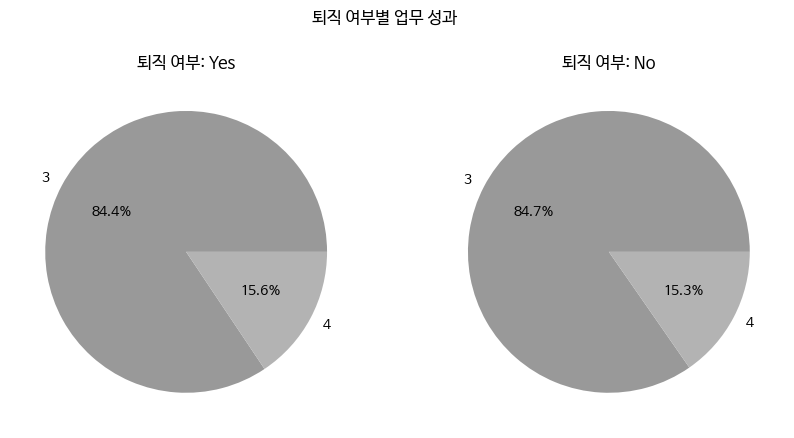

In [20]:
import matplotlib.pyplot as plt

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
satisfaction_counts = df.groupby(['Attrition', 'PerformanceRating']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_satisfaction = satisfaction_counts['Yes']
no_satisfaction = satisfaction_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))
plt.rc('font', family='NanumBarunGothic')

# 색상 설정
colors = ['#999999', '#B3B3B3']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('퇴직 여부별 업무 성과')
plt.show()


눈에 띄게 퇴직 여부별로 업무 성과에 있어 큰 차이가 나지 않는다.

### 5) 일한 회사의 수

일한 회사의 수가 많은 사람은 역시 퇴직(아마 퇴직을 통한 이직)가능성이 높을까?

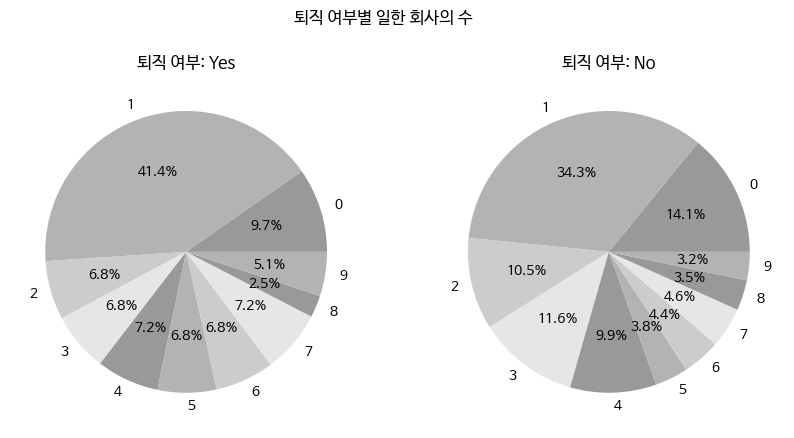

In [21]:
plt.rc('font', family='NanumBarunGothic')
# Age와 Attrition, MonthlyIncome 컬럼 선택
df_numcompanies = df[[ 'Attrition', 'NumCompaniesWorked']]


# Attrition 여부에 따른 분할
attrition_yes = df_numcompanies[df_numcompanies['Attrition'] == 'Yes']
attrition_no = df_numcompanies[df_numcompanies['Attrition'] == 'No']

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
df_numcompanies_counts = df_numcompanies.groupby(['Attrition', 'NumCompaniesWorked']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_df_numcompanies = df_numcompanies_counts['Yes']
no_df_numcompanies = df_numcompanies_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']
plt.rc('font', family='NanumBarunGothic')

plt.subplot(1, 2, 1)
plt.pie(yes_df_numcompanies, labels=yes_df_numcompanies.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_df_numcompanies, labels=no_df_numcompanies.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('퇴직 여부별 일한 회사의 수 ')
plt.show()


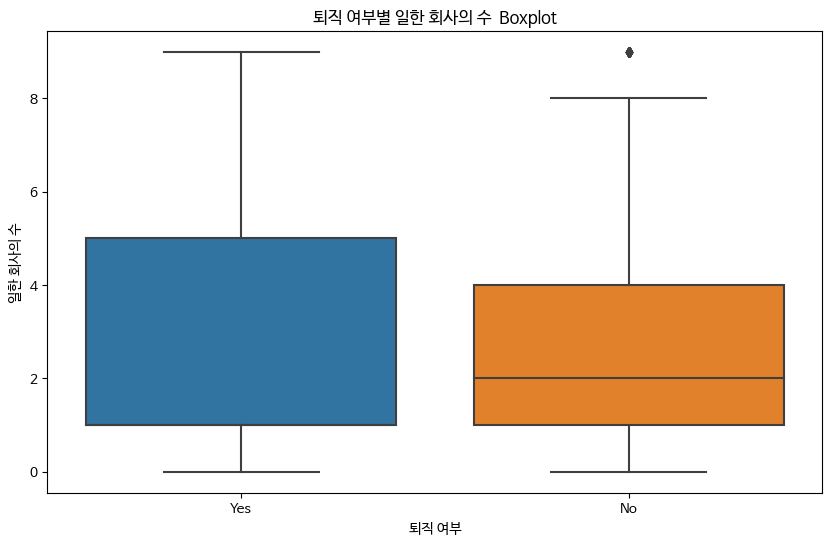

In [22]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df_numcompanies)
plt.xlabel('퇴직 여부')
plt.ylabel('일한 회사의 수')
plt.title('퇴직 여부별 일한 회사의 수  Boxplot')

plt.show()

## 1번의 과정을 총 35가지 요인(변수)에 대해 적용하여 살펴보고, 본인이 생각하기에 가장 중요한 요인으로 판단되는 요인을 3가지 이내로 선정하여 최소 1장 혹은 5장 이내의 보고서로 작성할 것

## Pycaret을 통한 피처 중요도 확인

피처 중요도 확인을 통해 타겟변수(퇴직여부)에 영향을 많이 미치는 변수가 어떤 것이 있는지 확인해보고자 한다.

In [23]:
# !pip install pycaret

In [24]:
# from pycaret.classification import *

In [25]:
# PyCaret 설정
#model = setup(data=df, target='Attrition')



LightGBM에서 오류가 발생하므로 상위 5개의 결과를 가지고 분석

In [26]:

# 모델 비교 (LightGBM 모델 제외)
#best_model = compare_models(include=['lda', 'ridge', 'ada', 'gbc', 'xgboost'])


In [27]:
#xgboost_model = create_model('xgboost')

# 추가 분석(2차분석)


In [28]:
age_limit_list = range(df['Age'].min(), df['Age'].max()+1) # 분석할 나이 범위 (최소 나이부터 최대 나이까지)
resignation_rate_dict = {} # 각 나이별 퇴사자 비율을 저장할 딕셔너리

for age_limit in age_limit_list:
    age_limited_df = df[df['Age'] <= age_limit] # 나이가 age_limit 이하인 데이터만 선택
    attrition_count = age_limited_df['Attrition'].value_counts() # 퇴사 여부별로 카운트
    if 'Yes' in attrition_count.index: # 퇴사자가 있는 경우만 비율 계산
        resignation_rate = attrition_count['Yes'] / len(age_limited_df) # 퇴사자 비율 계산
        resignation_rate_dict[age_limit] = resignation_rate # 딕셔너리에 저장

# 퇴사자 비율이 가장 높은 나이 찾기
max_resignation_rate_age = max(resignation_rate_dict, key=resignation_rate_dict.get)

# 퇴사자 비율이 높은 순서대로 정렬
sorted_resignation_rate = sorted(resignation_rate_dict.items(), key=lambda x: x[1], reverse=True)

# 상위 5개 나이 출력
for i in range(10):
    age, rate = sorted_resignation_rate[i]
    print(f'{i+1}위: {age}세 이하 - 퇴사자 비율 {rate*100:.2f}%')



1위: 19세 이하 - 퇴사자 비율 58.82%
2위: 20세 이하 - 퇴사자 비율 57.14%
3위: 21세 이하 - 퇴사자 비율 53.66%
4위: 18세 이하 - 퇴사자 비율 50.00%
5위: 22세 이하 - 퇴사자 비율 47.37%
6위: 23세 이하 - 퇴사자 비율 43.66%
7위: 24세 이하 - 퇴사자 비율 39.18%
8위: 25세 이하 - 퇴사자 비율 35.77%
9위: 26세 이하 - 퇴사자 비율 34.57%
10위: 28세 이하 - 퇴사자 비율 28.29%


기본 특성과 관련한 분석에서 젊은 층에서 퇴직자가 굉장히 많았다. 따라서 35세 이하의 집단에 대해 분석해 보고자 한다.

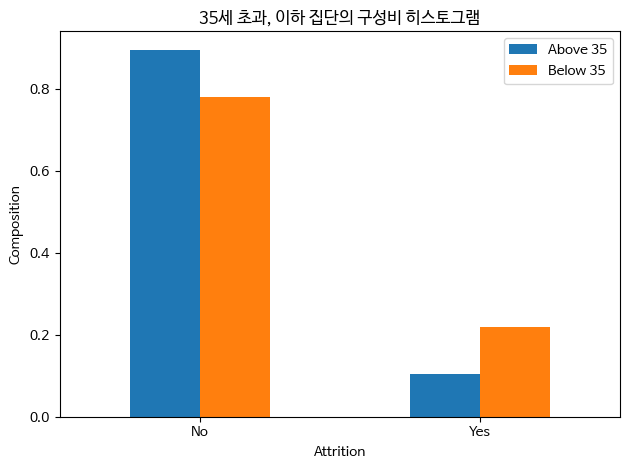

In [38]:

# Age와 Attrition 컬럼 선택
df_age_attrition = df[['Age', 'Attrition']]

# Age가 35 이상인 그룹과 35 이하인 그룹으로 데이터 분할
above_35 = df_age_attrition[df_age_attrition['Age'] > 35]
below_35 = df_age_attrition[df_age_attrition['Age'] <= 35]


#count
above_35_count = above_35['Attrition'].value_counts()
below_35_count = below_35['Attrition'].value_counts()



# 각 그룹의 구성비 계산
above_35_composition = above_35['Attrition'].value_counts() / len(above_35)
below_35_composition = below_35['Attrition'].value_counts() / len(below_35)

# 시각화
composition_df = pd.DataFrame({'Above 35': above_35_composition, 'Below 35': below_35_composition})
ax = composition_df.plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('Composition')
plt.title('35세 초과, 이하 집단의 구성비 히스토그램')
plt.xticks(rotation=0)

plt.legend()
plt.tight_layout()
plt.show()

In [30]:
print("35세 이상 그룹의 구성비:")
print(above_35_composition)
print("\n35세 미만 그룹의 구성비:")
print(below_35_composition)
print('-'*100)
print("\n35세 이상 그룹의 샘플 수:")
print(above_35_count)
print("\n35세 미만 그룹의 샘플 수:")
print(below_35_count)


35세 이상 그룹의 구성비:
No     0.896086
Yes    0.103914
Name: Attrition, dtype: float64

35세 미만 그룹의 구성비:
No     0.780521
Yes    0.219479
Name: Attrition, dtype: float64
----------------------------------------------------------------------------------------------------

35세 이상 그룹의 샘플 수:
No     664
Yes     77
Name: Attrition, dtype: int64

35세 미만 그룹의 샘플 수:
No     569
Yes    160
Name: Attrition, dtype: int64


엥 !

35세이하의 집단에서 퇴직 비율이 더 높았다! 심지어 샘플 수도 크게 차이나지 않는데 말이다! 젊은층이 퇴직을 비율로도, 실제 count로도 더 많이 한다!

### 초과근무가 35세 이하 집단을 퇴직으로?

초과근무가 단순 yes or no라는 범주형 변수여서 본 분석에서는 유의미하게 보진 않으려고 했는데 궁금해졌다. 35세 이하인 집단에서 초과근무와 35세 이상인 집단에서 초과근무의 비교를!

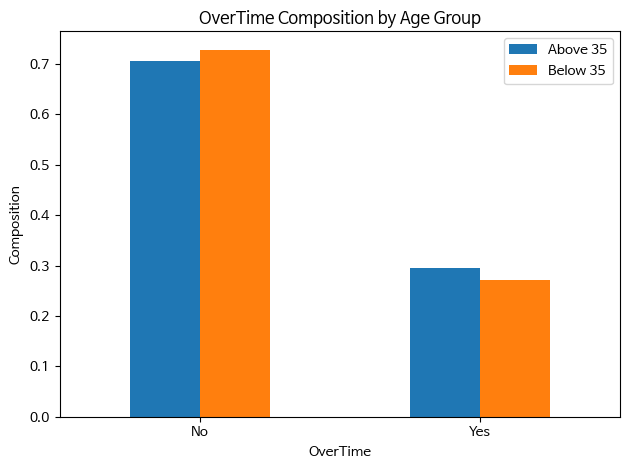

In [31]:
# Age와 Attrition, Overtime 컬럼 선택
df_age_attrition_overtime = df[['Age', 'Attrition', 'OverTime']]

# Age가 35 이상인 그룹과 35 이하인 그룹으로 데이터 분할
above_35 = df_age_attrition_overtime[df_age_attrition_overtime['Age'] > 35]
below_35 = df_age_attrition_overtime[df_age_attrition_overtime['Age'] <= 35]

# 각 그룹의 구성비 계산
above_35_composition = above_35['OverTime'].value_counts() / len(above_35)
below_35_composition = below_35['OverTime'].value_counts() / len(below_35)

# 시각화
composition_df = pd.DataFrame({'Above 35': above_35_composition, 'Below 35': below_35_composition})
ax = composition_df.plot(kind='bar')
plt.xlabel('OverTime')
plt.ylabel('Composition')
plt.title('OverTime Composition by Age Group')
plt.xticks(rotation=0)

plt.legend()
plt.tight_layout()
plt.show()

그렇다고 35세 이하 집단에서 초과근무를 더 많이 했다고 보기도 어렵다. 무엇이 35세 이하 집단을 퇴직으로 이끌었을까?

### 월수입에 불만이었을까?

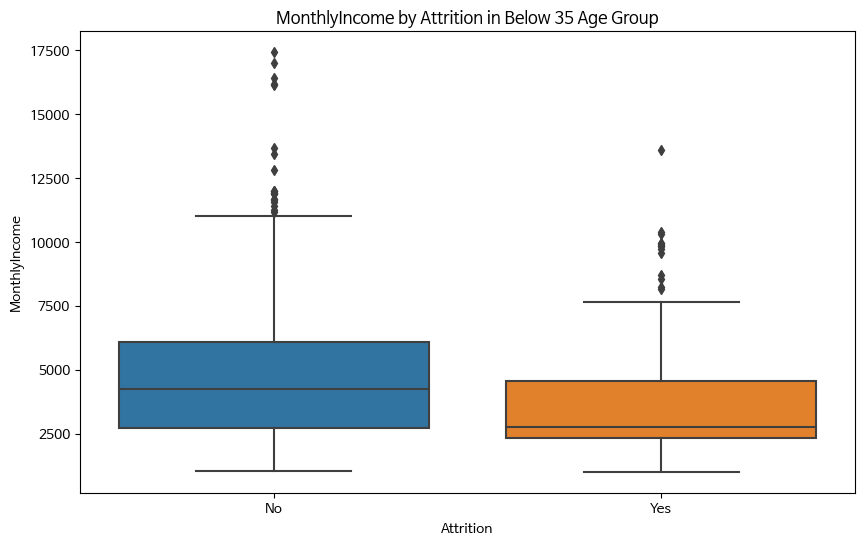

In [32]:
# Age와 Attrition, MonthlyIncome 컬럼 선택
df_age_attrition_MonthlyIncome = df[['Age', 'Attrition', 'MonthlyIncome']]

# Age가 35 이상인 그룹과 35 이하인 그룹으로 데이터 분할
above_35 = df_age_attrition_MonthlyIncome[df_age_attrition_MonthlyIncome['Age'] > 35]
below_35 = df_age_attrition_MonthlyIncome[df_age_attrition_MonthlyIncome['Age'] <= 35]


# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=below_35)
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.title('MonthlyIncome by Attrition in Below 35 Age Group')

plt.show()

집단 간 평균 차이를 볼때 월수입이 퇴직을 결정하게 만든 중요 요인으로 보인다. 하지만 기업 입장에서 퇴직을 막는다고 무작정 연봉을 올린다고 될 문제는 아니다. 다른 요인도 살펴봐야 할 것이다.

### 업무환경에 불만이었을까?

EnvironmentSatisfaction

업무환경 또한 젊은 층에서 기업을 선택하는 데에 중요한 영향을 미친다. 35세이하 집단에서 퇴직자의 업무환경만족도는 어떨까?

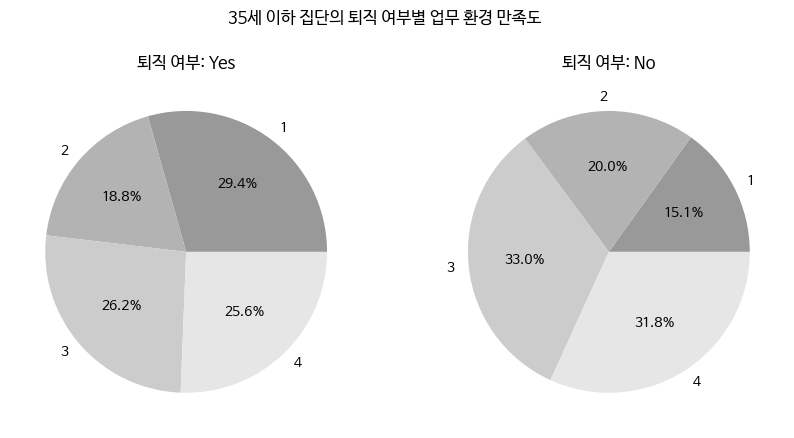

In [33]:
plt.rc('font', family='NanumBarunGothic')
# Age와 Attrition, MonthlyIncome 컬럼 선택
df_age_attrition_EnvironmentSatisfaction = df[['Age', 'Attrition', 'EnvironmentSatisfaction']]

# Age가 35 이상인 그룹과 35 이하인 그룹으로 데이터 분할
above_35 = df_age_attrition_EnvironmentSatisfaction[df_age_attrition_EnvironmentSatisfaction['Age'] > 35]
below_35 = df_age_attrition_EnvironmentSatisfaction[df_age_attrition_EnvironmentSatisfaction['Age'] <= 35]


# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
satisfaction_counts = below_35.groupby(['Attrition', 'EnvironmentSatisfaction']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_satisfaction = satisfaction_counts['Yes']
no_satisfaction = satisfaction_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('35세 이하 집단의 퇴직 여부별 업무 환경 만족도')
plt.show()


역시 그들은 업무 환경에 불만이 많았다. 확연한 차이가 보인다.

### 집과의 거리가 먼 것도 영향을 미쳤을까?

젊은 층에게 워라벨은 중요하다. 집과의 거리또한 워라벨에 영향을 미친다. 과연 데이터 상으로도 그럴까?

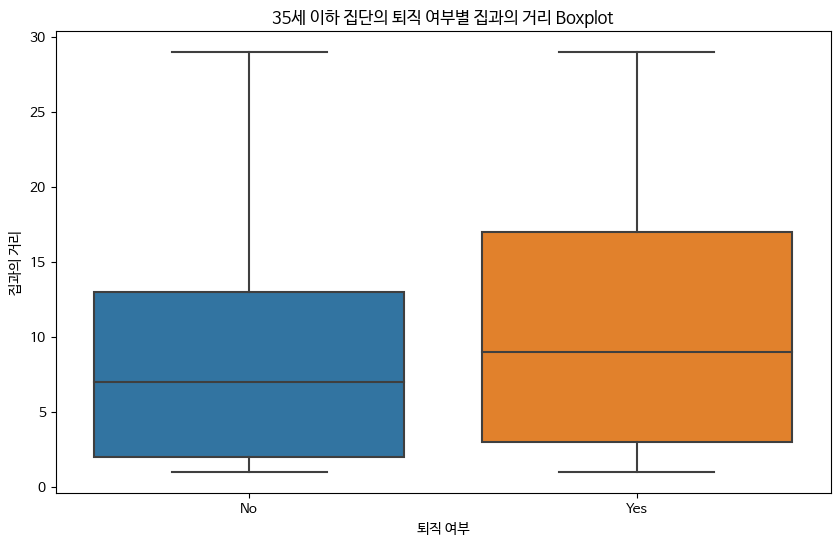

In [34]:
# Age와 Attrition, MonthlyIncome 컬럼 선택
df_age_attrition_DistanceFromHome = df[['Age', 'Attrition', 'DistanceFromHome']]

# Age가 35 이상인 그룹과 35 이하인 그룹으로 데이터 분할
above_35 = df_age_attrition_DistanceFromHome[df_age_attrition_DistanceFromHome['Age'] > 35]
below_35 = df_age_attrition_DistanceFromHome[df_age_attrition_DistanceFromHome['Age'] <= 35]


# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=below_35)
plt.xlabel('퇴직 여부')
plt.ylabel('집과의 거리')
plt.title('35세 이하 집단의 퇴직 여부별 집과의 거리 Boxplot')

plt.show()

역시 퇴직자들에게 회사는 멀었다. 하지만 그렇게 큰 차이가 있는지는 모르겠다. 그래도 집과의 거리가 영향을 줬을 가능성이 있다는 것은 사실

### 35세 이하 집단은 일한 회사의 수가 퇴직에 영향을 줬을까?

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


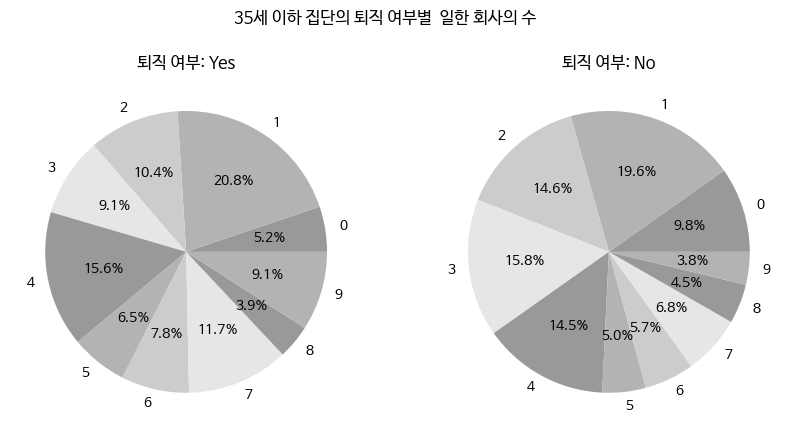

In [48]:
plt.rc('font', family='NanumBarunGothic')
# Age와 Attrition, MonthlyIncome 컬럼 선택
df_age_attrition_EnvironmentSatisfaction = df[['Age', 'Attrition', 'NumCompaniesWorked']]

# Age가 35 이상인 그룹과 35 이하인 그룹으로 데이터 분할
above_35 = df_age_attrition_EnvironmentSatisfaction[df_age_attrition_EnvironmentSatisfaction['Age'] > 35]
below_35 = df_age_attrition_EnvironmentSatisfaction[df_age_attrition_EnvironmentSatisfaction['Age'] <= 35]


# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
satisfaction_counts = above_35.groupby(['Attrition', 'NumCompaniesWorked']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_satisfaction = satisfaction_counts['Yes']
no_satisfaction = satisfaction_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('35세 이하 집단의 퇴직 여부별 일한 회사의 수')
plt.show()


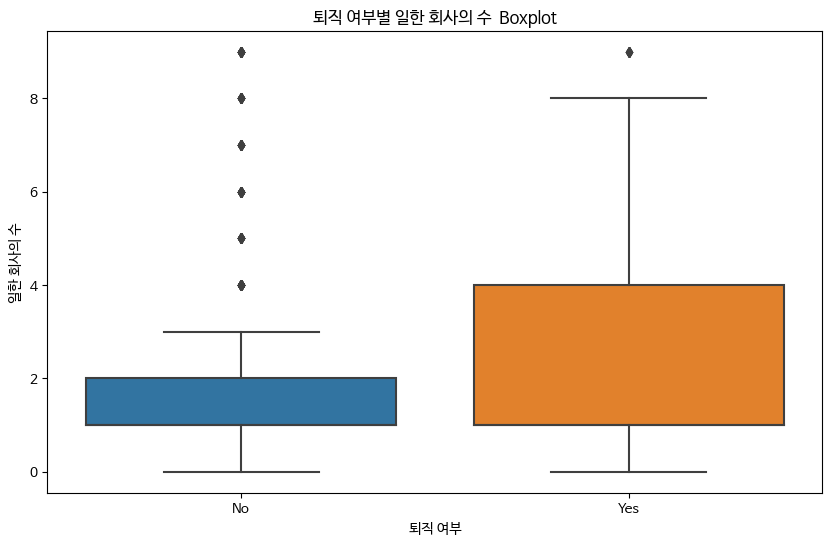

In [43]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=below_35)
plt.xlabel('퇴직 여부')
plt.ylabel('일한 회사의 수')
plt.title('퇴직 여부별 일한 회사의 수  Boxplot')

plt.show()

### 대인관계 만족도는 어땠을까?



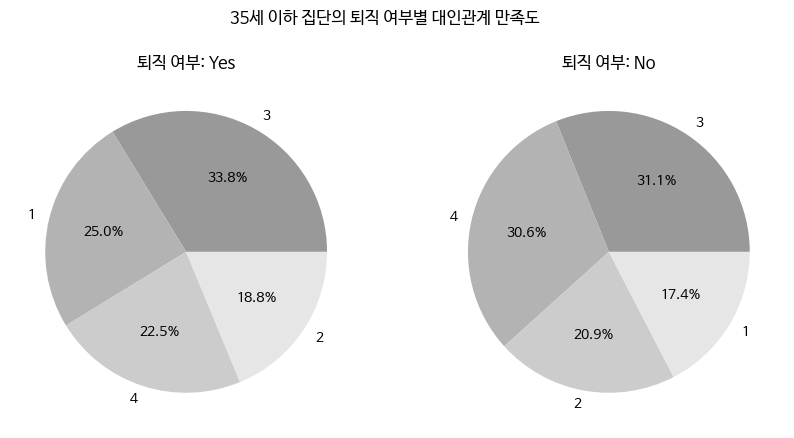

In [49]:
plt.rc('font', family='NanumBarunGothic')

# Age와 Attrition, RelationshipSatisfaction 컬럼 선택
df_age_attrition_RelationshipSatisfaction = df[['Age', 'Attrition', 'RelationshipSatisfaction']]

# Age가 35 이하인 그룹으로 데이터 분할
below_35 = df_age_attrition_RelationshipSatisfaction[df_age_attrition_RelationshipSatisfaction['Age'] <= 35]

# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# 퇴직 여부에 따른 대인관계 만족도 데이터 추출
yes_satisfaction = attrition_yes['RelationshipSatisfaction'].value_counts()
no_satisfaction = attrition_no['RelationshipSatisfaction'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%', colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%', colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('35세 이하 집단의 퇴직 여부별 대인관계 만족도')
plt.show()


### 워라벨 만족도는 어땠을까?



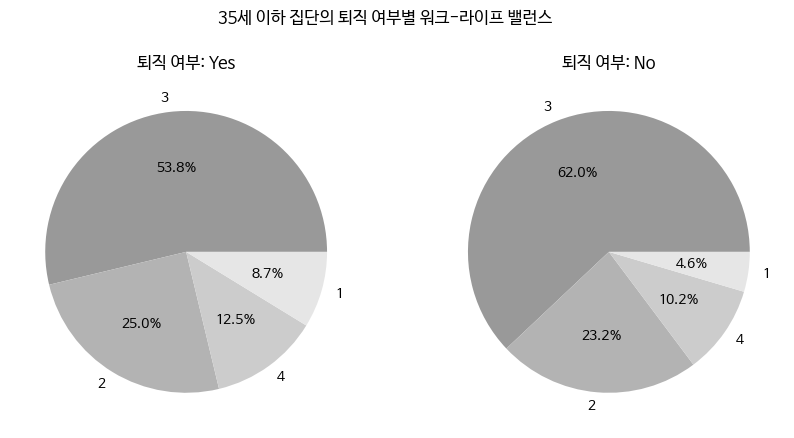

In [56]:
plt.rc('font', family='NanumBarunGothic')

# Age와 Attrition, WorkLifeBalance 컬럼 선택
df_age_attrition_WorkLifeBalance = df[['Age', 'Attrition', 'WorkLifeBalance']]

# Age가 35 이하인 그룹으로 데이터 분할
below_35 = df_age_attrition_WorkLifeBalance[df_age_attrition_WorkLifeBalance['Age'] <= 35]

# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# 퇴직 여부에 따른 워크-라이프 밸런스 데이터 추출
yes_balance = attrition_yes['WorkLifeBalance'].value_counts()
no_balance = attrition_no['WorkLifeBalance'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_balance, labels=yes_balance.index, autopct='%1.1f%%', colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_balance, labels=no_balance.index, autopct='%1.1f%%', colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('35세 이하 집단의 퇴직 여부별 워크-라이프 밸런스')
plt.show()


### 업무 참여도는 어땠을까?



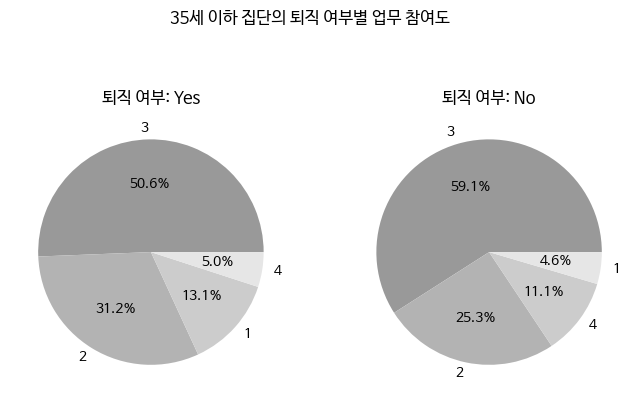

In [54]:
plt.rc('font', family='NanumBarunGothic')

# Age와 Attrition, JobInvolvement 컬럼 선택
df_age_attrition_JobInvolvement = df[['Age', 'Attrition', 'JobInvolvement']]

# Age가 35 이하인 그룹으로 데이터 분할
below_35 = df_age_attrition_JobInvolvement[df_age_attrition_JobInvolvement['Age'] <= 35]

# 35세 이하인 그룹에서 Attrition이 있는 데이터와 없는 데이터로 분할
attrition_yes = below_35[below_35['Attrition'] == 'Yes']
attrition_no = below_35[below_35['Attrition'] == 'No']

# 퇴직 여부에 따른 작업 참여도 데이터 추출
yes_involvement = attrition_yes['JobInvolvement'].value_counts()
no_involvement = attrition_no['JobInvolvement'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_involvement, labels=yes_involvement.index, autopct='%1.1f%%', colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_involvement, labels=no_involvement.index, autopct='%1.1f%%', colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('35세 이하 집단의 퇴직 여부별 업무 참여도')
plt.show()
